In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

file_path="../config/config.yaml"

with open(file_path, "r") as stream:
    config = yaml.safe_load(stream)

OUTPUT_DIR = config.get("SELECTED_FEATURES_DIR")
OUTPUT_DIR = os.path.join("..", OUTPUT_DIR, "cv_results")


Found 5 files in ../selected_features/cv_results.

Plotting for: rfecv_base_nfeat_80_pca_scaled_count_cv_results.json


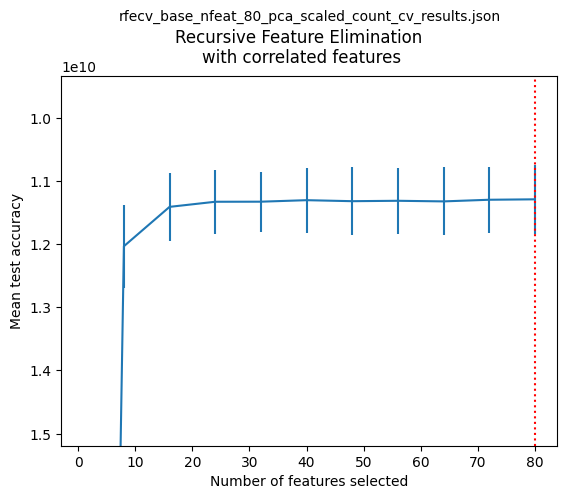


Plotting for: rfecv_base_poi_pano_nfeat_182_pca_scaled_count_cv_results.json


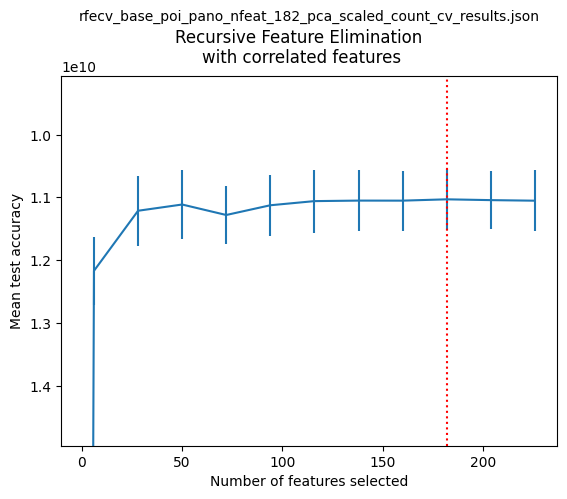


Plotting for: rfecv_all_nfeat_44_pca_scaled_count_cv_results.json


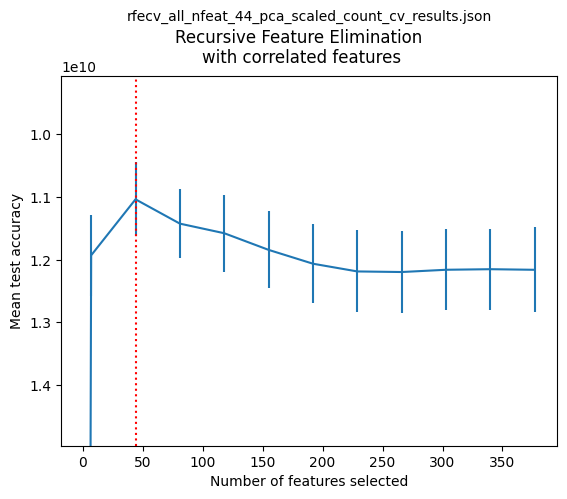


Plotting for: rfecv_base_pano_nfeat_28_pca_scaled_count_cv_results.json


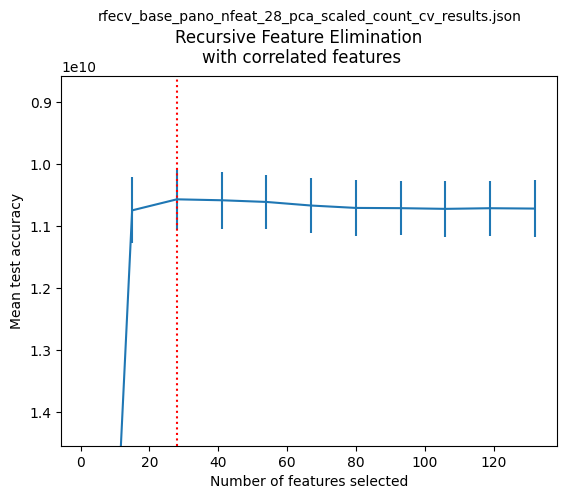


Plotting for: rfecv_base_poi_nfeat_174_pca_scaled_count_cv_results.json


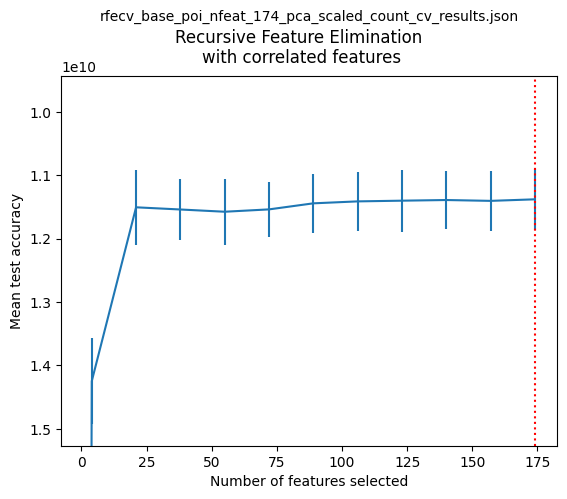

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


all_files = os.listdir(OUTPUT_DIR)
print(f"Found {len(all_files)} files in {OUTPUT_DIR}.")

cv_results_files = [f for f in all_files if f.endswith('_cv_results.json')]

if not cv_results_files:
    print(f"No '_cv_results.json' files found in {OUTPUT_DIR}.")
else:
    for cv_file in cv_results_files:
        print(f"\nPlotting for: {cv_file}")
        cv_results_full_path = os.path.join(OUTPUT_DIR, cv_file)
        with open(cv_results_full_path, 'r') as f:
            cv_results_data = json.load(f)

            cv_results = pd.DataFrame(cv_results_data)
            plt.figure()
            plt.xlabel("Number of features selected")
            plt.ylabel("Mean test accuracy")
            plt.errorbar(
                x=cv_results["n_features"],
                y=-cv_results["mean_test_score"],
                yerr=cv_results["std_test_score"],
            )
            plt.suptitle("Recursive Feature Elimination \nwith correlated features")    
            plt.title(cv_file, fontsize=10, pad=40)


            # mark optimal number of features
            optimal_features = cv_results["n_features"][cv_results["mean_test_score"].idxmax()]
            optimal_score = cv_results["mean_test_score"].max()

            plt.axvline(x=optimal_features, color='r', linestyle=':', label=f'Optimal Features: {optimal_features}')
            plt.plot(optimal_features, optimal_score, 'ro', markersize=8) 

            min_score = -cv_results["mean_test_score"].min()
            max_score = -cv_results["mean_test_score"].max()

            plt.ylim(max_score - (max_score - min_score) * 0.1, max_score + (max_score - min_score) * 0.05)

            plt.show()